# ROP Optimization 9-17-2021
PhD Mao Romero

### Depth Analysis 1500-2500 M: 
Off-shore Public data

### Objective: 
ROP mean analysis

### Data Description:
Initial data has drilling parameters

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# open excel file
from pandas import ExcelWriter
from pandas import ExcelFile

### 1. Downloading Drilling data

In [2]:
# Downloading drilling parameters data (no selec especific sheet data)
dp_orig = pd.read_excel('Drill_Param_1500-2500_M.xlsx')

#### 1.1. Time range analysis and drilling parameters

In [3]:
# Head overview of the information
dp_orig.head()

,TIME,ACTECDR,APRESR,APRESM,ACTECDM,TCDM,BITDEP,BLOCKCOMP,FLOWIN,PUMP,...,SSRPMINM,SSRPMAXM,HERC_V2_AVGZM,HERC_V2_MAXXYM,HERC_V2_AVGXYM,HERC_V2_MAXZM,ROP_AVG,HKLD_AVG,AT2_GTFM,INNM
0,sec,sg,bar,bar,sg,degC,m,m,l/min,bar,...,RPM,RPM,gravity,gravity,gravity,gravity,m/hr,tonne,deg,deg
1,12/04/13-00:21:02,-999.25,-999.25,-999.25,-999.25,-999.25,1157.4,41.2189,0,1.6164,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0,116.261,-999.25,-999.25
2,12/04/13-00:21:05,-999.25,-999.25,-999.25,-999.25,-999.25,1157.4,41.2189,0,1.5897,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0,116.278,-999.25,-999.25
3,12/04/13-00:21:08,-999.25,-999.25,-999.25,-999.25,-999.25,1157.4,41.2189,0,1.6083,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0,116.257,-999.25,-999.25
4,12/04/13-00:21:10,-999.25,-999.25,-999.25,-999.25,-999.25,1157.4,41.2189,0,1.6169,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0,116.167,-999.25,-999.25


In [4]:
# Tail overview of the information
dp_orig.tail()

,TIME,ACTECDR,APRESR,APRESM,ACTECDM,TCDM,BITDEP,BLOCKCOMP,FLOWIN,PUMP,...,SSRPMINM,SSRPMAXM,HERC_V2_AVGZM,HERC_V2_MAXXYM,HERC_V2_AVGXYM,HERC_V2_MAXZM,ROP_AVG,HKLD_AVG,AT2_GTFM,INNM
580756,21/04/13-16:34:54,-999.25,-999.25,-999.25,-999.25,-999.25,1161.56,9.5724,0,3.3011,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0,60.4878,-999.25,-999.25
580757,21/04/13-16:34:56,1.3762,153.234,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
580758,21/04/13-16:34:57,-999.25,-999.25,-999.25,-999.25,-999.25,1161.56,7.2025,0,3.2611,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0,55.597,-999.25,-999.25
580759,21/04/13-16:34:58,1.3771,153.326,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25
580760,21/04/13-16:35:00,1.377,153.323,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25


In [5]:
# General Information
dp_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580761 entries, 0 to 580760
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   TIME            580761 non-null  object
 1   ACTECDR         580761 non-null  object
 2   APRESR          580761 non-null  object
 3   APRESM          580761 non-null  object
 4   ACTECDM         580761 non-null  object
 5   TCDM            580761 non-null  object
 6   BITDEP          580761 non-null  object
 7   BLOCKCOMP       580761 non-null  object
 8   FLOWIN          580761 non-null  object
 9   PUMP            580761 non-null  object
 10  SURF_RPM        580761 non-null  object
 11  TORQUE_AVG      580761 non-null  object
 12  TOTGAS          580761 non-null  object
 13  WOB_AVG         580761 non-null  object
 14  SSRPMAVM        580761 non-null  object
 15  SSRPMINM        580761 non-null  object
 16  SSRPMAXM        580761 non-null  object
 17  HERC_V2_AVGZM   580761 non-nu

#### Data selection for further analysis

In [6]:
# dropping row- Symbol information - index 0
dp_orig.drop(0, inplace=True)

In [7]:
# reset index dropping index initial values
dp_orig.reset_index(drop=True, inplace=True)

In [8]:
dp_orig['Time_index'] = pd.to_datetime(dp_orig.TIME, format='%d/%m/%y-%H:%M:%S')

In [9]:
dp_orig.set_index('Time_index', inplace=True)

In [10]:
# Dropping columns no used for analysis
dp_orig.columns

Index(['TIME', 'ACTECDR', 'APRESR', 'APRESM', 'ACTECDM', 'TCDM', 'BITDEP',
       'BLOCKCOMP', 'FLOWIN', 'PUMP', 'SURF_RPM', 'TORQUE_AVG', 'TOTGAS',
       'WOB_AVG', 'SSRPMAVM', 'SSRPMINM', 'SSRPMAXM', 'HERC_V2_AVGZM',
       'HERC_V2_MAXXYM', 'HERC_V2_AVGXYM', 'HERC_V2_MAXZM', 'ROP_AVG',
       'HKLD_AVG', 'AT2_GTFM', 'INNM'],
      dtype='object')

In [11]:
dp_orig.drop(columns=['TIME','ACTECDR','APRESR','APRESM', 'ACTECDM', 'TCDM',
       'TOTGAS','SSRPMAVM', 'SSRPMINM', 'SSRPMAXM', 'HERC_V2_AVGZM',
       'HERC_V2_MAXXYM', 'HERC_V2_AVGXYM', 'HERC_V2_MAXZM',
       'HKLD_AVG', 'AT2_GTFM', 'INNM'], inplace=True)

In [12]:
# convert bit depth from object to float (trigger convertion option)
dp_orig.BITDEP = dp_orig.BITDEP.astype('float64') 

In [13]:
# convert all columns of DataFrame
dp_orig.iloc[:,1:] = dp_orig.iloc[:,1:].astype('float64') 

In [14]:
dp_orig.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580760 entries, 2013-04-12 00:21:02 to 2013-04-21 16:35:00
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BITDEP      580760 non-null  float64
 1   BLOCKCOMP   580760 non-null  float64
 2   FLOWIN      580760 non-null  float64
 3   PUMP        580760 non-null  float64
 4   SURF_RPM    580760 non-null  float64
 5   TORQUE_AVG  580760 non-null  float64
 6   WOB_AVG     580760 non-null  float64
 7   ROP_AVG     580760 non-null  float64
dtypes: float64(8)
memory usage: 39.9 MB


#### Checking Time Log - Make sure time is always increasing & avoid repeting data

In [15]:
# checking Time is increasing
n = 0
for i in range(dp_orig.index.shape[0]-1):
    if dp_orig.index[i+1] < dp_orig.index[i]:
        n = i+1
        print(dp_mod.Date[i+1], dp_mod.Date[i])
#
if n==0:
        print('Data Time is always increasing')

Data Time is always increasing


In [17]:
#Checking time data is repeting
m = 0
for i in range(dp_orig.index.shape[0]-1):          # i start from 0
    if dp_orig.index[i+1] == dp_orig.index[i]:
        m = i+1
        #print(i)
if m >0:
    print('Data Time is repiting, check it out')
else:
    print('Data Time is Not repiting')

Data Time is repiting, check it out


### Cleaning drilling data

In [19]:
# Original Data size
row_o = dp_orig.shape[0]   # original row size
col_o = dp_orig.shape[1]   # original columns size
print('Original data size :',dp_orig.shape)

Original data size : (580760, 8)


In [21]:
# Eliminating negative data (all negative drilling parameters)
#
Neg_val = dp_orig.loc[(dp_orig.BITDEP<0) & (dp_orig.FLOWIN<0) & (dp_orig.SURF_RPM<0)& (dp_orig.WOB_AVG<0)]
#
dp_orig.drop(Neg_val.index, inplace=True)

In [22]:
# Reduzed original data size after eliminating negative values
print('Data size after eliminating negative values :',dp_orig.shape)
row_n = dp_orig.shape[0]   # original row size
col_n = dp_orig.shape[1]   # original columns size
#
print('Data Reduction due to negative values =', round(row_n/row_o*100,2), '%')

Data size after eliminating negative values : (201551, 8)
Data Reduction due to negative values = 34.7 %


In [23]:
#Checking if time data is repeting
m = 0
for i in range(dp_orig.index.shape[0]-1):          # i start from 0
    if dp_orig.index[i+1] == dp_orig.index[i]:
        m = i+1
        #print(i)
if m >0:
    print('Data Time is repiting, check it out')
else:
    print('Data Time is Not repiting')

Data Time is Not repiting


#### Evaluating drilling parameters

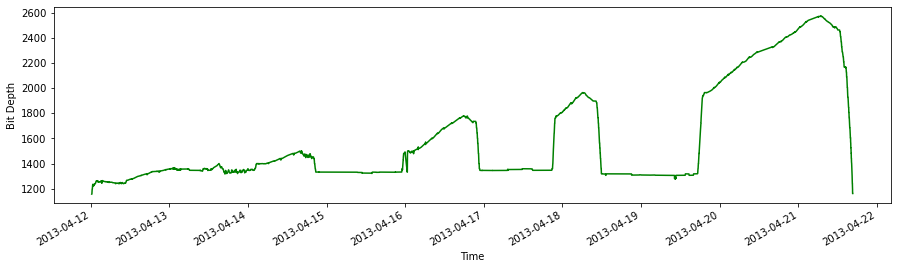

In [24]:
# 1.1.- Checking Bit depth
dp_orig.BITDEP.plot(color='g',figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Bit Depth')
plt.show()

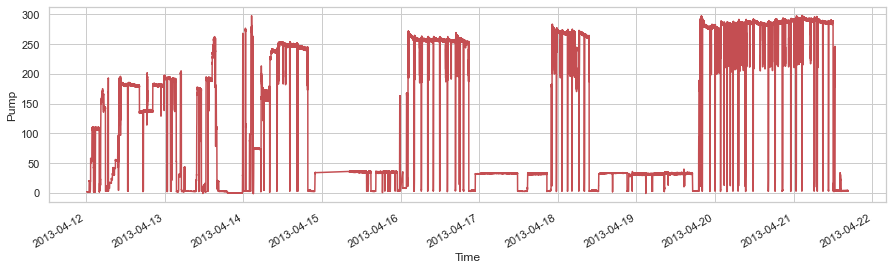

In [55]:
# 1.2.- Checking Pump & Flow rate values
dp_orig.PUMP.plot(color='r',figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Pump')
plt.show()

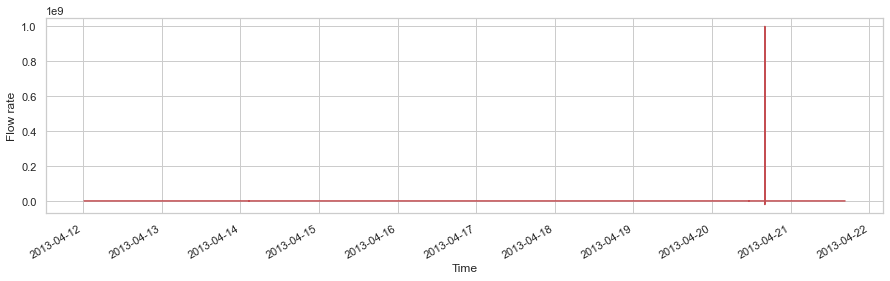

In [211]:
# 1.2.- Checking Pump & Flow rate values
dp_orig.FLOWIN.plot(color='r',figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Flow rate')
plt.show()

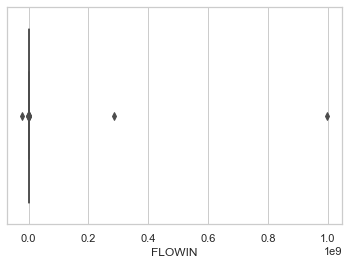

In [204]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.FLOWIN)

In [235]:
# flow rate values operating OUTSIDE tool limits 5700 lit/min (1500 gal/min) plus 30% safe factor
#
nehf = dp_orig.loc[dp_orig.FLOWIN>7500].FLOWIN.count()
nebf = dp_orig.loc[(dp_orig.FLOWIN<-1000)].FLOWIN.count() # -999.25 is a default value when not recording data
#
print('Flow rate data over operating limits :',nehf,'rows')
print('Flow rate data below operating limits :',nebf,'rows')

Flow rate data over operating limits : 7 rows
Flow rate data below operating limits : 4 rows


In [224]:
# modifiting flow rate values outside operating limits
dp_orig['FLOWC'] = dp_orig.apply(lambda x: x.PUMP*18 if x['FLOWIN']>7500 else (x.PUMP*18 if x['FLOWIN']<-1000 else x['FLOWIN']), axis=1)  
#

In [228]:
dp_orig.loc[dp_orig.FLOWIN > 7500]

,BITDEP,BLOCKCOMP,FLOWIN,PUMP,SURF_RPM,TORQUE_AVG,WOB_AVG,ROP_AVG,flo-pum,FLOWC
Time_index,,,,,,,,,,
2013-04-14 02:42:39,1400.3506,6.4027,1.566089e+05,269.2505,60.1197,8.7208,4.1858,26.9381,5.816475e+02,4846.5090
2013-04-20 11:14:30,2284.7090,3.1549,8.997451e+05,285.5319,140.2077,16.1197,14.1984,35.3779,3.151119e+03,5139.5742
2013-04-20 11:14:36,2284.7576,3.1065,8.837460e+03,285.1442,140.2077,18.3327,14.3818,34.7801,3.099295e+01,5132.5956
2013-04-20 11:32:00,2287.6890,0.1738,2.115715e+04,287.1339,1.6516,0.0074,14.8207,0.0512,7.368392e+01,5168.4102
2013-04-20 16:06:44,2327.4585,0.5293,9.969505e+08,283.6441,4.9532,0.0031,-0.9484,3.8025,3.514794e+06,5105.5938
2013-04-20 16:06:46,2327.3989,0.5885,2.848460e+08,284.1896,4.9544,0.0032,-1.3002,3.8025,1.002310e+06,5115.4128
2013-04-20 16:06:58,2327.0479,0.9386,1.171651e+04,283.4279,4.9549,0.0044,-2.4893,3.8025,4.133860e+01,5101.7022


In [229]:
dp_orig.loc[dp_orig.FLOWIN <-1000]

,BITDEP,BLOCKCOMP,FLOWIN,PUMP,SURF_RPM,TORQUE_AVG,WOB_AVG,ROP_AVG,flo-pum,FLOWC
Time_index,,,,,,,,,,
2013-04-14 02:42:36,1400.3506,6.4027,-2.127071e+06,270.0337,60.1196,7.7112,4.4768,26.9381,-7877.058493,4860.6066
2013-04-14 02:42:42,1400.3506,6.4027,-6.471564e+03,271.1541,60.1197,9.6977,4.3368,26.9381,-23.866737,4880.7738
2013-04-20 11:14:33,2284.7278,3.1361,-5.971094e+04,285.4137,140.2077,15.7697,14.2901,34.7558,-209.208379,5137.4466
2013-04-20 16:06:49,2327.3450,0.6424,-2.034161e+07,283.0946,4.9550,0.0045,-1.3594,3.8025,-71854.461371,5095.7028


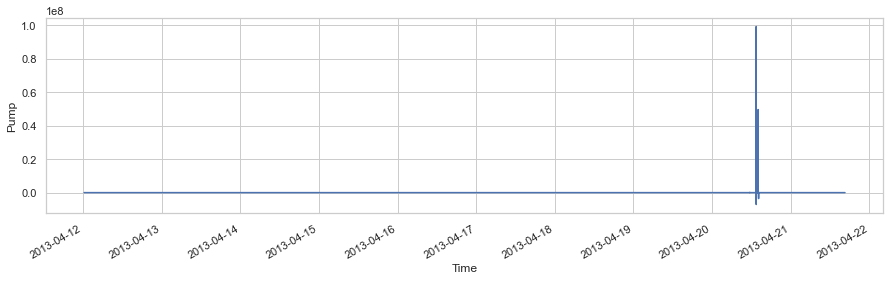

In [255]:
# 1.3.- Checking Surface RPM and Torque values
dp_orig.SURF_RPM.plot(color='b',figsize=(15,4))
plt.xlabel('Time')
plt.ylabel('Pump')
plt.show()

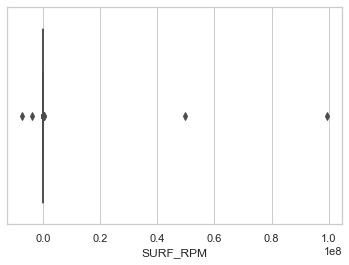

In [256]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.SURF_RPM)

In [257]:
# Surface RPM values operating OUTSIDE tool limits 200 rpm plus 30% safe factor
#
nehs = dp_orig.loc[dp_orig.SURF_RPM>250].SURF_RPM.count()
nebs = dp_orig.loc[(dp_orig.SURF_RPM<-260)].SURF_RPM.count() # -999.25 is a default value when not recording data
#
print('Flow rate data over operating limits :',nehs,'rows')
print('Flow rate data below operating limits :',nebs,'rows')

Flow rate data over operating limits : 36 rows
Flow rate data below operating limits : 3581 rows


In [268]:
dp_orig.loc[dp_orig.FLOWIN >7500]

,BITDEP,BLOCKCOMP,FLOWIN,PUMP,SURF_RPM,TORQUE_AVG,WOB_AVG,ROP_AVG,flo-pum,FLOWC
Time_index,,,,,,,,,,
2013-04-14 02:42:39,1400.3506,6.4027,1.566089e+05,269.2505,60.1197,8.7208,4.1858,26.9381,5.816475e+02,4846.5090
2013-04-20 11:14:30,2284.7090,3.1549,8.997451e+05,285.5319,140.2077,16.1197,14.1984,35.3779,3.151119e+03,5139.5742
2013-04-20 11:14:36,2284.7576,3.1065,8.837460e+03,285.1442,140.2077,18.3327,14.3818,34.7801,3.099295e+01,5132.5956
2013-04-20 11:32:00,2287.6890,0.1738,2.115715e+04,287.1339,1.6516,0.0074,14.8207,0.0512,7.368392e+01,5168.4102
2013-04-20 16:06:44,2327.4585,0.5293,9.969505e+08,283.6441,4.9532,0.0031,-0.9484,3.8025,3.514794e+06,5105.5938
2013-04-20 16:06:46,2327.3989,0.5885,2.848460e+08,284.1896,4.9544,0.0032,-1.3002,3.8025,1.002310e+06,5115.4128
2013-04-20 16:06:58,2327.0479,0.9386,1.171651e+04,283.4279,4.9549,0.0044,-2.4893,3.8025,4.133860e+01,5101.7022


Text(0, 0.5, 'Pump')

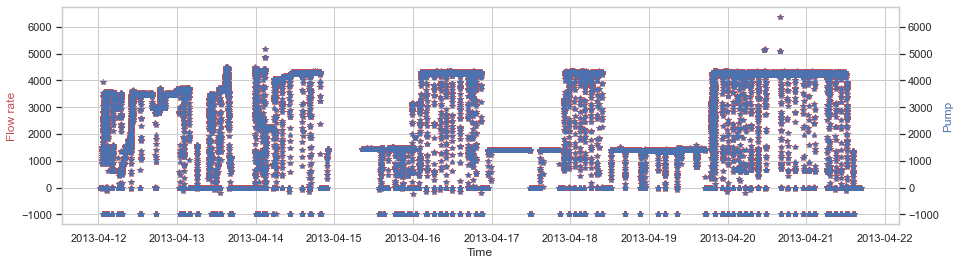

In [259]:
# Eliminating flow rate values over 5700 lit/min (1500 gal/min) limited by BHA limits
#
x = dp_orig.index #loc['2013-4-20'].index
y1 = dp_orig['FLOWC']    # Flow Rate
y2 = dp_orig.FLOWC   # PUMP 
#
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15,4))
#
ax2 = ax1.twinx()
ax1.plot(x, y1, 'r*')     # Bit Depth
ax2.plot(x, y2, 'b.')     # Block Position
ax1.set_xlabel('Time')
ax1.set_ylabel('Flow rate', color='r')
ax2.set_ylabel('Pump', color='b')

In [ ]:
#out = dp_orig.loc[dp_orig.FLOWIN<-200000,['FLOWIN','PUMP']].index
#dp_orig.drop(out, inplace=True)

In [ ]:
#sns.set(style="whitegrid")
#ax = sns.boxplot(x=dp_orig.loc[dp_orig.FLOWIN<200000,'FLOWIN'])

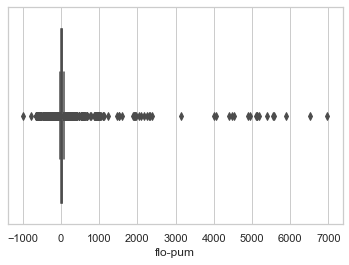

In [74]:
#sns.set(style="whitegrid")
#ax = sns.boxplot(x=dp_orig.loc[(dp_orig['flo-pum']>-1000) & (dp_orig['flo-pum']<300000),'flo-pum'])

In [260]:
# Bit off Bottom DataFrame
df_con = pd.DataFrame(dp_orig.BITDEP.copy())

In [261]:
# Matrix for Bit depth On / Off bottom
Ref = 0
con_h = 0
con_l = 0
con = 0
#
for i in range(dp_orig.index.shape[0]-1):          # i start from 0
    if dp_orig.BITDEP[i+1] >= Ref:
        Ref = dp_orig.BITDEP[i+1]
        df_con.loc[dp_orig.index[i],'BOnB'] = Ref
        #print(i,' Higher', Ref)
    else:
        delta = i-con_l
        con_l = i
        #print(i,' Menor',Ref,dp_orig.BITDEP[i+1])
        if delta >2:
            con = con +1
            #print('Connection =', con)
        df_con.loc[dp_orig.index[i],con] = dp_orig.BITDEP[i+1]
            

In [264]:
#df_con.loc[:,6].plot(figsize=(15,3))
df_con.shape
df_con.head()

,BITDEP,BOnB,1,2,3,4,5,6,7,8,...,125,126,127,128,129,130,131,132,133,134
Time_index,,,,,,,,,,,,,,,,,,,,,
2013-04-12 00:21:02,1157.3987,1157.3987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12 00:21:05,1157.3987,1157.3987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12 00:21:08,1157.3987,1157.3987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12 00:21:10,1157.3987,1157.3987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-12 00:21:13,1157.3987,1157.3987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Time_index'>

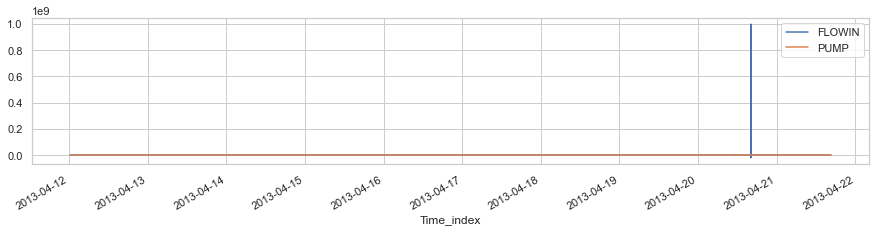

In [265]:
dp_orig.loc[:,['FLOWIN','PUMP']].plot(figsize=(15,3))

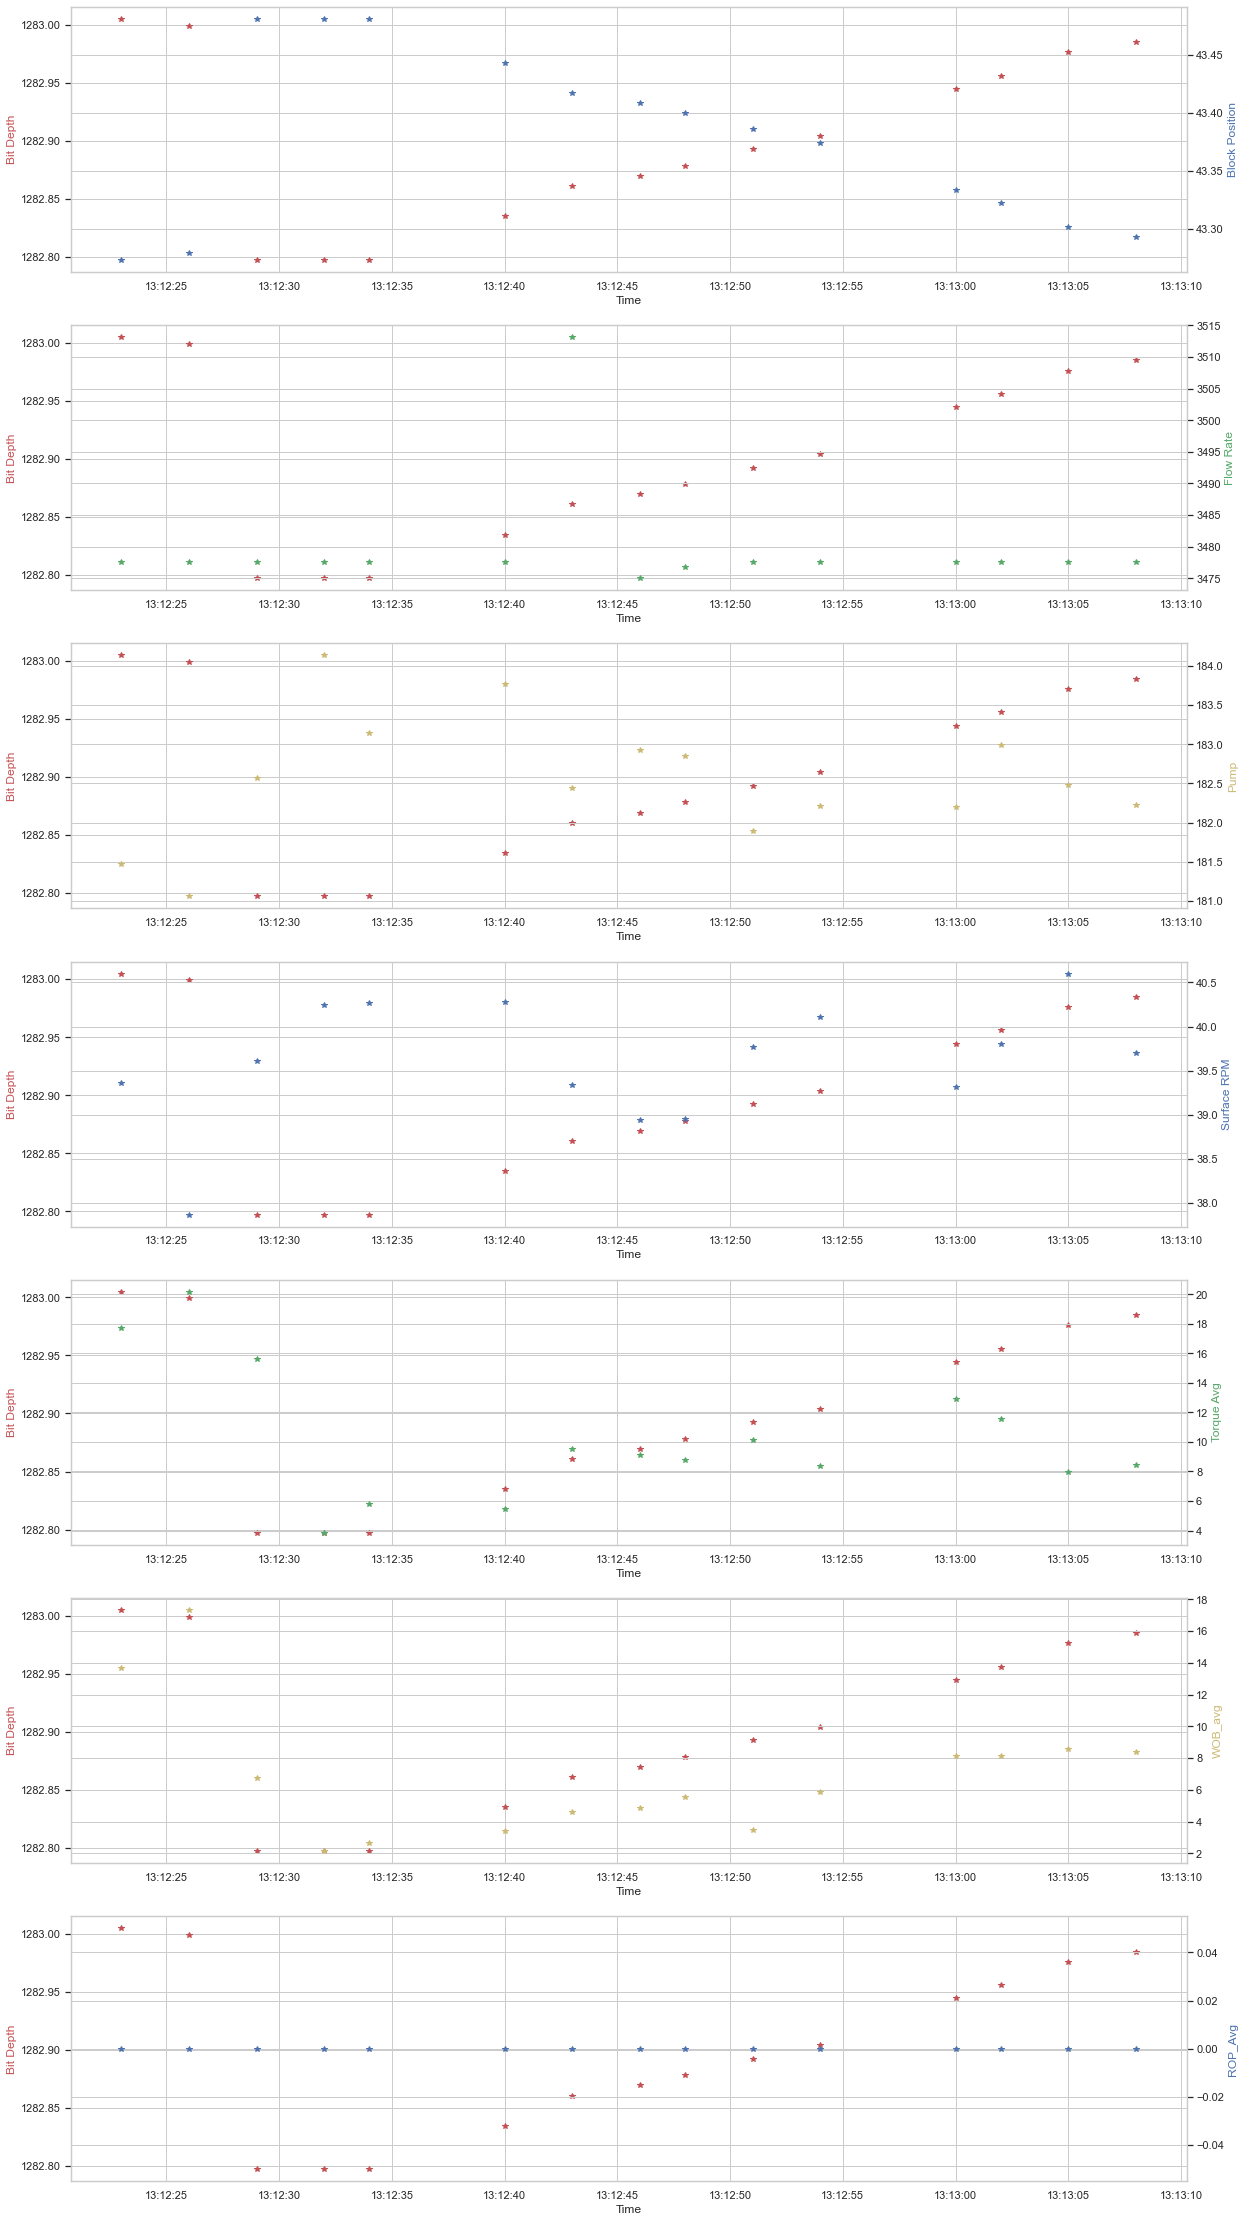

In [279]:
#conn = df_con['BOnB']>0
conn = df_con[30]>0
x = df_con.loc[conn].index
y1 = dp_orig.loc[df_con.loc[conn].index].BITDEP     # bit depth
y2 = dp_orig.loc[df_con.loc[conn].index].BLOCKCOMP #loc['2013-4-20'].BLOCKCOMP
y3 = dp_orig.loc[df_con.loc[conn].index].FLOWIN    # Flow Rate
y4 = dp_orig.loc[df_con.loc[conn].index].PUMP   # PUMP 
y5 = dp_orig.loc[df_con.loc[conn].index].SURF_RPM   # SURFACE RPM 
y6 = dp_orig.loc[df_con.loc[conn].index].TORQUE_AVG   # TORQUE_Avg 
y7 = dp_orig.loc[df_con.loc[conn].index].WOB_AVG   # WOB_Avg
y8 = dp_orig.loc[df_con.loc[conn].index].ROP_AVG   # ROP_Avg
#
fig, (ax1, ax3, ax5, ax7, ax9, ax11, ax13) = plt.subplots(nrows=7, ncols=1, figsize=(20,40))
#
ax2 = ax1.twinx()
ax1.plot(x, y1, 'r*')     # Bit Depth
ax2.plot(x, y2, 'b*')     # Block Position
ax1.set_xlabel('Time')
ax1.set_ylabel('Bit Depth', color='r')
ax2.set_ylabel('Block Position', color='b')
#
ax4 = ax3.twinx()
ax3.plot(x, y1, 'r*')     # Bit Depth
ax4.plot(x, y3, 'g*')     # Flow Rate
ax3.set_xlabel('Time')
ax3.set_ylabel('Bit Depth', color='r')
ax4.set_ylabel('Flow Rate', color='g')
#
ax6 = ax5.twinx()
ax5.plot(x, y1, 'r*')     # Bit Depth
ax6.plot(x, y4, 'y*')     # Pump
ax5.set_xlabel('Time')
ax5.set_ylabel('Bit Depth', color='r')
ax6.set_ylabel('Pump', color='y')
#
ax8 = ax7.twinx()
ax7.plot(x, y1, 'r*')     # Bit Depth
ax8.plot(x, y5, 'b*')     # Surface RPM
ax7.set_xlabel('Time')
ax7.set_ylabel('Bit Depth', color='r')
ax8.set_ylabel('Surface RPM', color='b')
#
ax10 = ax9.twinx()
ax9.plot(x, y1, 'r*')     # Bit Depth
ax10.plot(x, y6, 'g*')     # Torque_Avg
ax9.set_xlabel('Time')
ax9.set_ylabel('Bit Depth', color='r')
ax10.set_ylabel('Torque Avg', color='g')
#
ax12 = ax11.twinx()
ax11.plot(x, y1, 'r*')     # Bit Depth
ax12.plot(x, y7, 'y*')     # WOB_Avg
ax11.set_xlabel('Time')
ax11.set_ylabel('Bit Depth', color='r')
ax12.set_ylabel('WOB_avg', color='y')
#
ax14 = ax13.twinx()
ax13.plot(x, y1, 'r*')     # Bit Depth
ax14.plot(x, y8, 'b*')     # ROP_Avg
ax13.set_xlabel('Time')
ax13.set_ylabel('Bit Depth', color='r')
ax14.set_ylabel('ROP_Avg', color='b')
#
plt.show()

In [ ]:
# 1.2.- Checking Block Position shoul be made of positive values
#dp_orig.loc[(dp_orig.PUMP<-1) & (dp_orig.FLOWIN<0),['SURF_RPM','WOB_AVG']].plot(figsize=(15,5))
#dp_orig.loc[(dp_orig.PUMP>10) & (dp_orig.FLOWIN<0)]
dp_orig.loc[dp_orig.WOB_AVG<-500,['WOB_AVG']] #.plot(figsize=(15,5))
#plt.xlabel('Time')
#plt.ylabel('Bit Depth')
#plt.show()

#### Creating delta VALUES for: Time, MD, BlockComp, FLOWIN, PUMP, SUR_RPM, TORQUE_AVG, WOB_AVG

In [ ]:
# adding 8 columns for delta values in the same dataframe
dp_orig['Tim_D'] = 0.0
dp_orig['Bit_D'] = 0.0
dp_orig['Block_D'] = 0.0
dp_orig['FLOW_D'] = 0.0
dp_orig['PUMP_D'] = 0.0
dp_orig['SRPM_D'] = 0.0
dp_orig['TORQUE_D'] = 0.0
dp_orig['WOB_D'] = 0.0

In [ ]:
dp_orig.info()

In [ ]:
# Creating delta time
for i in range(dp_orig.index.shape[0]-1):
    delta_time = dp_orig.index[i+1]-dp_orig.index[i]
    dp_orig.Tim_D[i+1] = delta_time.seconds #dp_cl.index[i+1] - dp_cl.index[i] 
#    print(delta_time)
#    print(delta_time.seconds)
    
dp_orig.Tim_D.plot()

In [ ]:
dp_orig.Tim_D.max()

In [ ]:
# Difference between the current and before data
dp_orig['Bit_D'] = dp_orig.BITDEP.diff()
dp_orig['Block_D'] = dp_orig.BLOCKCOMP.diff()
dp_orig['FLOW_D'] = dp_orig.FLOWIN.diff()
dp_orig['PUMP_D'] = dp_orig.PUMP.diff()
dp_orig['SRPM_D'] = dp_orig.SURF_RPM.diff()
dp_orig['TORQUE_D'] = dp_orig.TORQUE_AVG.diff()
dp_orig['WOB_D'] = dp_orig.WOB_AVG.diff()

In [ ]:
dp_orig['BLOCKCOMP'].plot()

In [ ]:
# analizing Surface RPM values
dp_orig.loc[:,'WOB_AVG'].plot()

In [ ]:
# Showing Surface RPM value outlayers
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.Bit_D)

In [ ]:
dp_orig.loc['2013-4-13 10:10',['BITDEP','SURF_RPM','TORQUE_AVG','WOB_AVG','FLOWIN','ROP_AVG']]

In [ ]:
# eliminating torque values over 70 KN.m or 50 Kft.lb (Positive side)
out = dp_orig.loc[dp_orig.TORQUE_AVG>70].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.TORQUE_AVG)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# eliminating torque values over 70 KN.m or 50 Kft.lb (Negative side)
out = dp_orig.loc[dp_orig.TORQUE_AVG<-70].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.TORQUE_AVG)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# Torque values after eliminating outlayers
dp_orig.loc[:,'TORQUE_AVG'].plot(color='orange')

In [ ]:
# eliminating torque values over 70 KN.m or 50 Kft.lb (Positive side)
out = dp_orig.loc[dp_orig.TORQUE_AVG>70].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.TORQUE_AVG)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# Analyzing WOB_AVG values
dp_orig.loc[dp_orig.WOB_AVG>0].WOB_AVG.plot()
dp_orig.loc[dp_orig.WOB_AVG<0].WOB_AVG.plot()

In [ ]:
# Showing WOB_AVG value outlayers
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.WOB_AVG)

In [ ]:
# eliminating WOB_AVG values over 227 tonne or 500 klb (Positive side)
out = dp_orig.loc[dp_orig.WOB_AVG>227].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.WOB_AVG)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# eliminating WOB_AVG values below 227 tonne or 500 klb (Positive side)
out = dp_orig.loc[dp_orig.WOB_AVG<-227].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.WOB_AVG)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# WOB_AVG values after eliminating outlayers
dp_orig.loc[:,'WOB_AVG'].plot(color='g')

In [ ]:
# Analyzing flow rate values
dp_orig.loc[dp_orig.FLOWIN>0].FLOWIN.plot()
dp_orig.loc[dp_orig.FLOWIN<0].FLOWIN.plot()

In [ ]:
# Showing Flow Rates value outlayers
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.FLOWIN)

In [ ]:
# eliminating flow rate values over 5700 lit/min or 1500 gal/min (Positive side)
out = dp_orig.loc[dp_orig.FLOWIN>5700].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.FLOWIN)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# eliminating flow rate values below 5700 lit/min or 1500 gal/min (Positive side)
out = dp_orig.loc[dp_orig.FLOWIN<-5700].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.FLOWIN)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# Fow rate values after eliminating outlayers
dp_orig.loc[:,'FLOWIN'].plot(color='g')

In [ ]:
# Analyzing SURF_RPM values
dp_orig.loc[dp_orig.SURF_RPM>0].SURF_RPM.plot()
dp_orig.loc[dp_orig.SURF_RPM<0].SURF_RPM.plot()

In [ ]:
# Showing Surface RPM value outlayers
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.SURF_RPM)

In [ ]:
# eliminating Surface rpm values over 300 rpms
out = dp_orig.loc[dp_orig.SURF_RPM>300].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.SURF_RPM)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# eliminating Surface rpm values below 300 rpms
out = dp_orig.loc[dp_orig.SURF_RPM<-300].index
dp_orig.drop(out, inplace=True)
#
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.SURF_RPM)
# How many values were eliminated?
dp_orig.shape

In [ ]:
# Surface RPM values after eliminating outlayers
dp_orig.loc[:,'SURF_RPM'].plot(color='g')

In [ ]:
# Analyzing PUMP values
#dp_orig.loc[dp_orig.PUMP>0].PUMP.plot()
dp_orig.loc[dp_orig.SURF_RPM>165,['SURF_RPM','TORQUE_AVG','WOB_AVG','FLOWIN','ROP_AVG']] #.plot()

In [ ]:
dp_orig.loc[dp_orig.SURF_RPM<-165,['SURF_RPM','TORQUE_AVG','WOB_AVG','FLOWIN','ROP_AVG']] #.plot()

In [ ]:
# Analyzing BLOCKCOMP values
dp_orig.loc[dp_orig.BLOCKCOMP>0].BLOCKCOMP.plot()
dp_orig.loc[dp_orig.BLOCKCOMP<0].BLOCKCOMP.plot()

In [ ]:
# Showing ROP_AVG value outlayers
sns.set(style="whitegrid")
ax = sns.boxplot(x=dp_orig.BLOCKCOMP)

In [ ]:
dp_orig.head()

In [ ]:
x = dp_orig.index #loc['2013-4-20'].index
y1 = dp_orig.BITDEP #loc['2013-4-20'].BITDEP
y2 = dp_orig.BLOCKCOMP #loc['2013-4-20'].BLOCKCOMP
y3 = dp_orig.FLOWIN    # Flow Rate
y4 = dp_orig.PUMP   # PUMP 
y5 = dp_orig.SURF_RPM   # SURFACE RPM 
y6 = dp_orig.TORQUE_AVG   # TORQUE_Avg 
y7 = dp_orig.WOB_AVG   # WOB_Avg
y8 = dp_orig.ROP_AVG   # ROP_Avg
#
fig, (ax1, ax3, ax5, ax7, ax9, ax11, ax13) = plt.subplots(nrows=7, ncols=1, figsize=(20,40))
#
ax2 = ax1.twinx()
ax1.plot(x, y1, 'r*')     # Bit Depth
ax2.plot(x, y2, 'b*')     # Block Position
ax1.set_xlabel('Time')
ax1.set_ylabel('Bit Depth', color='r')
ax2.set_ylabel('Block Position', color='b')
#
ax4 = ax3.twinx()
ax3.plot(x, y1, 'r*')     # Bit Depth
ax4.plot(x, y3, 'g*')     # Flow Rate
ax3.set_xlabel('Time')
ax3.set_ylabel('Bit Depth', color='r')
ax4.set_ylabel('Flow Rate', color='g')
#
ax6 = ax5.twinx()
ax5.plot(x, y1, 'r*')     # Bit Depth
ax6.plot(x, y4, 'y*')     # Pump
ax5.set_xlabel('Time')
ax5.set_ylabel('Bit Depth', color='r')
ax6.set_ylabel('Pump', color='y')
#
ax8 = ax7.twinx()
ax7.plot(x, y1, 'r*')     # Bit Depth
ax8.plot(x, y5, 'b*')     # Surface RPM
ax7.set_xlabel('Time')
ax7.set_ylabel('Bit Depth', color='r')
ax8.set_ylabel('Surface RPM', color='b')
#
ax10 = ax9.twinx()
ax9.plot(x, y1, 'r*')     # Bit Depth
ax10.plot(x, y6, 'g*')     # Torque_Avg
ax9.set_xlabel('Time')
ax9.set_ylabel('Bit Depth', color='r')
ax10.set_ylabel('Torque Avg', color='g')
#
ax12 = ax11.twinx()
ax11.plot(x, y1, 'r*')     # Bit Depth
ax12.plot(x, y7, 'y*')     # WOB_Avg
ax11.set_xlabel('Time')
ax11.set_ylabel('Bit Depth', color='r')
ax12.set_ylabel('WOB_avg', color='y')
#
ax14 = ax13.twinx()
ax13.plot(x, y1, 'r*')     # Bit Depth
ax14.plot(x, y8, 'b*')     # ROP_Avg
ax13.set_xlabel('Time')
ax13.set_ylabel('Bit Depth', color='r')
ax14.set_ylabel('ROP_Avg', color='b')
#
plt.show()
#ax1.legend(loc="upper left")
#ax2.legend(loc="upper right")

#max1 = df.cement.max()*1.2
#max2 = df.strength.max()*3
#axes = plt.gca()
#ax1.set_ylim([0,max1])
#ax2.set_ylim([0,max2])

In [ ]:
plt.plot_date(dp_orig.index, dp_orig.BITDEP)

### Clearing Data for Analysis

In [ ]:
dp_cl.loc[dp_cl.BITDEP_D>50,['BITDEP_D','WOB_AVG','BLOCKCOMP_D','FLOWIN_D','TORQUE_AVG_D']] #.plot()

In [ ]:
dp_cl.loc[dp_cl.WOB_AVG<0,['BITDEP','WOB_AVG','BLOCKCOMP','FLOWIN','SURF_RPM','TORQUE_AVG']]#.plot()

In [ ]:
plt.figure(figsize=(10,5))
x = dp_cl.WOB_AVG.loc[dp_cl.WOB_AVG<200]
ax = sns.distplot(x)